In [1]:
# Display page w/ 90% margins
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Climate data visualization

### Import dependencies

In [49]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt
# Import pandas to create dataframe
import pandas as pd

### Read climate data to dataframe

In [61]:
# Read climate data from CSV to Pandas DataFrame
climate_change = pd.read_csv('C:\\Users\\Bob\\Desktop\\SpringBoard\\Python_Projects\\data_visualization\\data_camp\\climate_change.csv', parse_dates=["date"], index_col="date")

### Explore the datasets

In [51]:
# Brief exploration of climate dataframe
climate_change.head(5)

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


In [52]:
# Print schema and core info
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-03-06 to 2016-12-06
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co2            699 non-null    float64
 1   relative_temp  706 non-null    float64
dtypes: float64(2)
memory usage: 16.5 KB


## Work with climate data

Text(0.5, 1.0, 'Relative Temperature by Years')

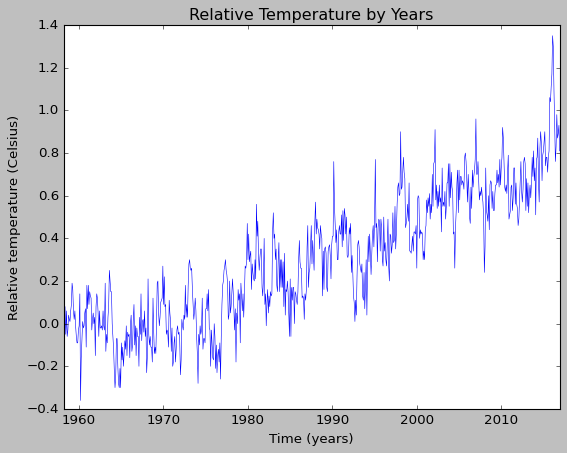

In [55]:
# Create figure and axes
fig, ax = plt.subplots()

# Adjust figure for visibility
fig.set_size_inches(8,6)

# Plot relative_temp by time
ax.plot(climate_change.index,climate_change["relative_temp"],linewidth = .5)

# Set title and axes labels
ax.set_xlabel("Time (years)")
ax.set_ylabel("Relative temperature (Celsius)")
ax.set_title("Relative Temperature by Years")



### Show window of climate data (Temperature in 1970s)

Text(0, 0.5, 'Relative temperature (Celsius)')

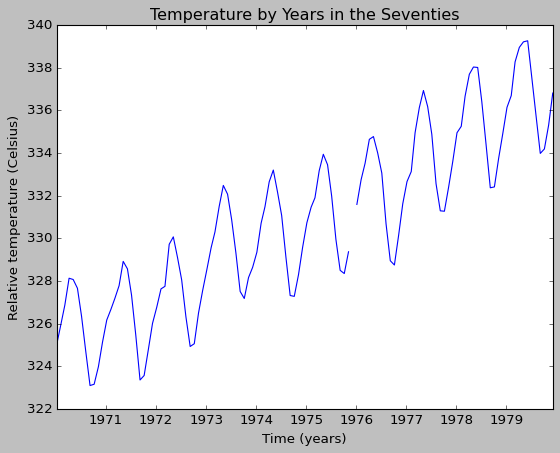

In [56]:
# Create figure and axes
fig, ax = plt.subplots()

# Take slice of dates from climate_change and set it to "seventies"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Plot the slice
ax.plot(seventies.index, seventies["co2"],linewidth = 1)

#Set title and axes
ax.set_title("Temperature by Years in the Seventies")
ax.set_xlabel("Time (years)")
ax.set_ylabel("Relative temperature (Celsius)")

### Overlay temperature and co2 by time

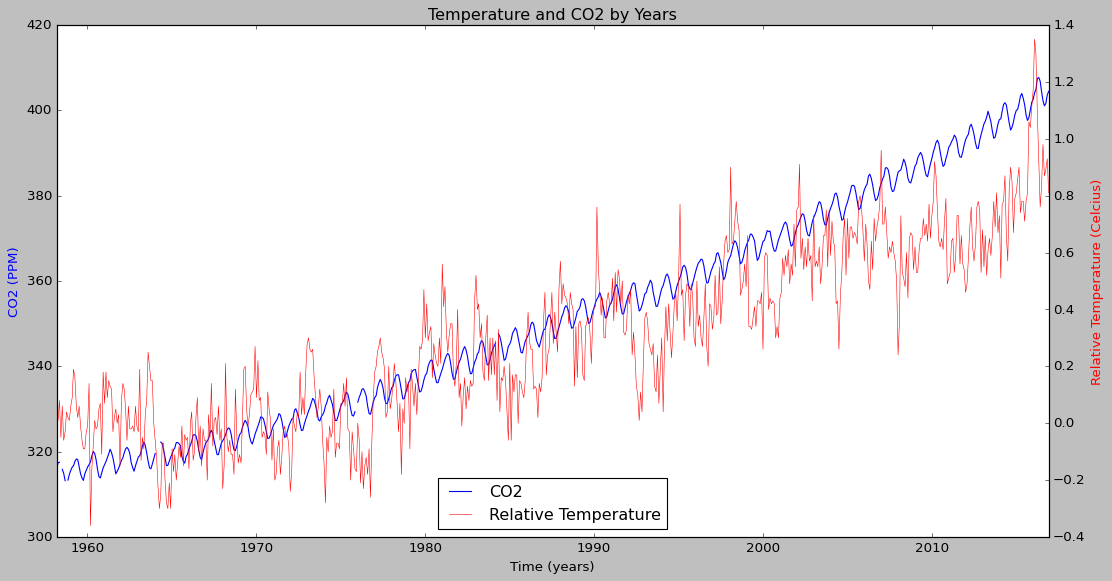

In [57]:
# Create figure and axes
fig, ax = plt.subplots()

# Use aesthetic style
plt.style.use('classic')

# Adjust figure for visibility
fig.set_size_inches(16,8)

# Plot CO2 in blue
lns1 = ax.plot(climate_change.index, climate_change["co2"], color='b',linewidth = 1,label="CO2")

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot relative temperature in red
lns2 = ax2.plot(climate_change.index, climate_change["relative_temp"], color='r', linewidth = .5,label="Relative Temperature")

# Set title and axes
ax.set_xlabel("Time (years)")
ax.set_ylabel("CO2 (PPM)")
ax2.set_ylabel("Relative Temperature (Celcius)")
ax.set_title("Temperature and CO2 by Years")
ax.yaxis.label.set_color('b')
ax2.yaxis.label.set_color('r')

# Add legend
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc="lower center")



### Linear regression of temperature

Text(31, 1.1, 'slope = 0.015')

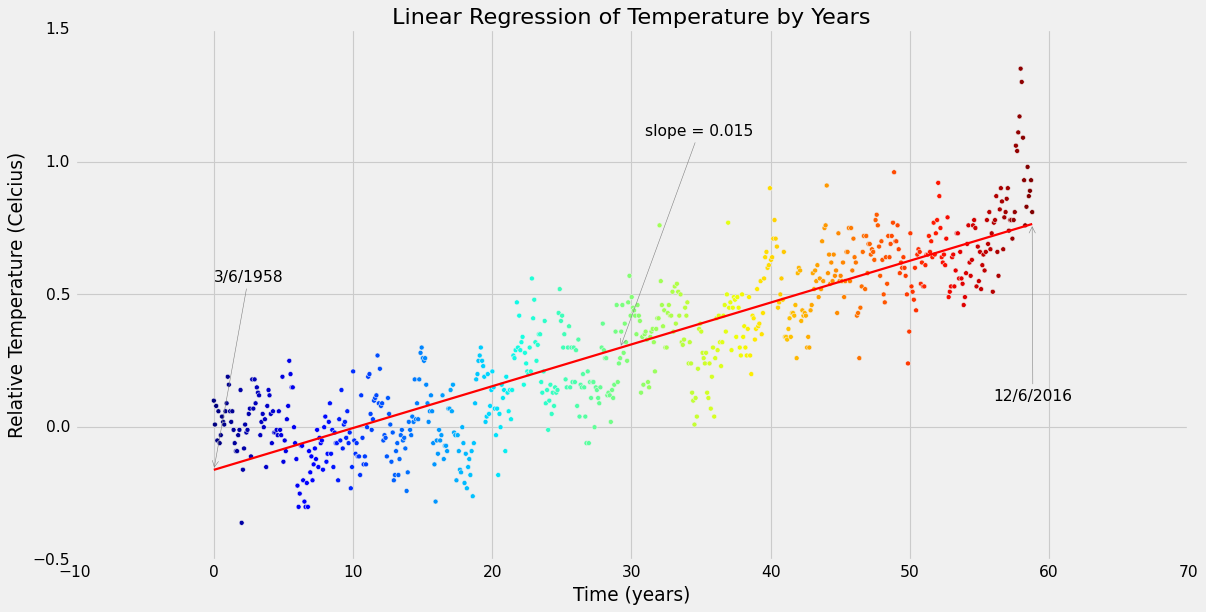

In [63]:
# Dependancy for linear regression modeling
from sklearn.linear_model import LinearRegression

# Use aesthetic style
plt.style.use('fivethirtyeight')

# Create figure and axes
fig, ax = plt.subplots()

# Adjust figure for visibility
fig.set_size_inches(16,8)

# Plot relative temperature with color temperature
ax.scatter(climate_change.years_elapsed, climate_change["relative_temp"], c=climate_change.years_elapsed)

# Plot linear regression of temperature in red
x = climate_change.years_elapsed.values.reshape(-1,1)
y = climate_change.relative_temp.values.reshape(-1,1)
linear_regressor = LinearRegression().fit(x,y)
y_pred = linear_regressor.predict(x)
ax.plot(x,y_pred,color='r',linewidth = 2)

# Set title and axes
ax.set_xlabel("Time (years)")
ax.set_ylabel("Relative Temperature (Celcius)")
ax.set_title("Linear Regression of Temperature by Years")

# Annotate first date, last date, slope

#... First date
ax.annotate("3/6/1958", xytext = (0,.55),
            xy=(x[0],y_pred[0]),arrowprops=dict(arrowstyle='->', color='gray'))

#... Last date
ax.annotate("12/6/2016", xytext = (56,.1),
            xy=(x[-1],y_pred[-1]),arrowprops=dict(arrowstyle='->', color='gray'))


#... Slope of linear regression
slope = linear_regressor.coef_
slope_join = ' '.join(map(str,slope))
slope_print = slope_join[1:6]

ax.annotate("slope = "+slope_print, xytext = (31,1.1),
            xy=(x[350],y_pred[350]),arrowprops=dict(arrowstyle='->', color='gray'))

